# Gridded Data: Remote access of satellite data from NOAA CoastWatch ERDDAP
Demonstrate query tools for finding remote sensing gridded data at the [NASA PO.DAAAC](https://podaac.jpl.nasa.gov). Use `xarray` with the `OPeNDATA` remote access protocol to download the desired subsets of data, and `xarray` to explore the data.

- [Emilio Mayorga](https://github.com/emiliom/), University of Washington and NANOOS/IOOS

[OceanHackWeek 2019](https://oceanhackweek.github.io/)

## [NOAA CoastWatch ERDDAP](https://coastwatch.pfeg.noaa.gov/erddap/) remote sensing dataset example
- Show quick search onilne via ERDDAP (makes it easier to explain)
  - Search datasets for "viirs chlorophyll"
  - Point out occurrence of DEPRECATED and EXPERIMENTAL datasets, then remove those from the search with -DEPRECATED -EXPERIMENTAL
- Select pmlEsaCCI31OceanColor8Day (b/c it's probably not available at the podaac)
- Say that the same search could be done with erddapy or "requests":
  https://coastwatch.pfeg.noaa.gov/erddap/search/index.html?searchFor=viirs+chlorophyll+-DEPRECATED+-EXPERIMENTAL
- But just grab the ".dods" url to pass to xarray.ds_open:
  https://coastwatch.pfeg.noaa.gov/erddap/griddap/pmlEsaCCI31OceanColor8Day

-------------------

# Import packages

In [1]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import datetime
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [2]:
from pathlib import Path

In [3]:
BASEPATH = Path('.')

# NOAA CoastWatch ERDDAP request

In [4]:
erddap_opendap_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/pmlEsaCCI31OceanColor8Day'

In [5]:
ds = xr.open_dataset(erddap_opendap_url)

In [6]:
ds

<xarray.Dataset>
Dimensions:             (latitude: 4320, longitude: 8640, time: 959)
Coordinates:
  * time                (time) datetime64[ns] 1997-09-04 ... 2018-06-26
  * latitude            (latitude) float32 89.979164 89.9375 ... -89.979164
  * longitude           (longitude) float32 -179.97917 -179.9375 ... 179.97917
Data variables:
    Rrs_412             (time, latitude, longitude) float32 ...
    Rrs_443             (time, latitude, longitude) float32 ...
    Rrs_490             (time, latitude, longitude) float32 ...
    Rrs_510             (time, latitude, longitude) float32 ...
    Rrs_555             (time, latitude, longitude) float32 ...
    Rrs_670             (time, latitude, longitude) float32 ...
    water_class1        (time, latitude, longitude) float32 ...
    water_class2        (time, latitude, longitude) float32 ...
    water_class3        (time, latitude, longitude) float32 ...
    water_class4        (time, latitude, longitude) float32 ...
    water_class5  

Is latitude reversed?? If so, is that an issue? ERDDAP plots it just fine, but I'm getting zero values in the xarray subset request
```
Dimensions:             (latitude: 4320, longitude: 8640, time: 959)
Coordinates:
  * time                (time) datetime64[ns] 1997-09-04 ... 2018-06-26
  * latitude            (latitude) float32 89.979164 89.9375 ... -89.979164
  * longitude           (longitude) float32 -179.97917 -179.9375 ... 179.97917
```

## The CCI Chlorophyll-a dataset ends on 2018-6
It doesn't overlap with the 2018-9 period we examined in the NASA PO.DAAC notebook. 

- Dimension variables have to match the actual dimension names. eg, `latitude` instead of `lat`.
- Using a reversed latitude order worked!!! YIKES. But maybe it's a good example of real-world issues ...

In [7]:
xy_bbox = dict(latitude=slice(26,25), longitude=slice(-61,-60))

We'll request a 3-year period for this 1-degree x 1-degree box.

In [8]:
subset = ds.sel(time=slice(datetime.datetime(2015,6,1), datetime.datetime(2018,6,1)), **xy_bbox)

In [9]:
subset

<xarray.Dataset>
Dimensions:             (latitude: 24, longitude: 24, time: 138)
Coordinates:
  * time                (time) datetime64[ns] 2015-06-02 ... 2018-05-25
  * latitude            (latitude) float32 25.979166 25.9375 ... 25.020834
  * longitude           (longitude) float32 -60.979168 -60.9375 ... -60.020832
Data variables:
    Rrs_412             (time, latitude, longitude) float32 ...
    Rrs_443             (time, latitude, longitude) float32 ...
    Rrs_490             (time, latitude, longitude) float32 ...
    Rrs_510             (time, latitude, longitude) float32 ...
    Rrs_555             (time, latitude, longitude) float32 ...
    Rrs_670             (time, latitude, longitude) float32 ...
    water_class1        (time, latitude, longitude) float32 ...
    water_class2        (time, latitude, longitude) float32 ...
    water_class3        (time, latitude, longitude) float32 ...
    water_class4        (time, latitude, longitude) float32 ...
    water_class5       

In [10]:
subset.nbytes/1e6

28.934928

In [11]:
subset_chlora = subset.chlor_a

In [12]:
subset_chlora.nbytes/1e6

0.317952

In [13]:
subset_chlora.load()

<xarray.DataArray 'chlor_a' (time: 138, latitude: 24, longitude: 24)>
array([[[0.041661, 0.040057, ...,      nan,      nan],
        [0.051761,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan, 0.037271]],

       [[0.042078, 0.041837, ..., 0.038263, 0.037092],
        [0.039785, 0.039621, ..., 0.037506, 0.036642],
        ...,
        [0.035885, 0.03695 , ..., 0.038017, 0.036938],
        [0.035853, 0.036365, ..., 0.038175, 0.036859]],

       ...,

       [[0.028397, 0.028064, ..., 0.041283, 0.030417],
        [0.026896, 0.019238, ..., 0.047914, 0.036214],
        ...,
        [     nan,      nan, ..., 0.031963, 0.031443],
        [     nan,      nan, ..., 0.030782, 0.028739]],

       [[0.033689, 0.035209, ...,      nan,      nan],
        [     nan, 0.024947, ...,      nan,      nan],
        ...,
        [     nan,      nan, ..., 0.021725, 0.022326],
        [0.027244,      nan, ..., 

It's only 0.3 2MB, but completing the request is fairly slow. There may be some inefficiencies on the server in how the data file(s) are sructured. Regardless, we've got the data and it was easy. Let's take a quick look. We'll plot the first and last time step.

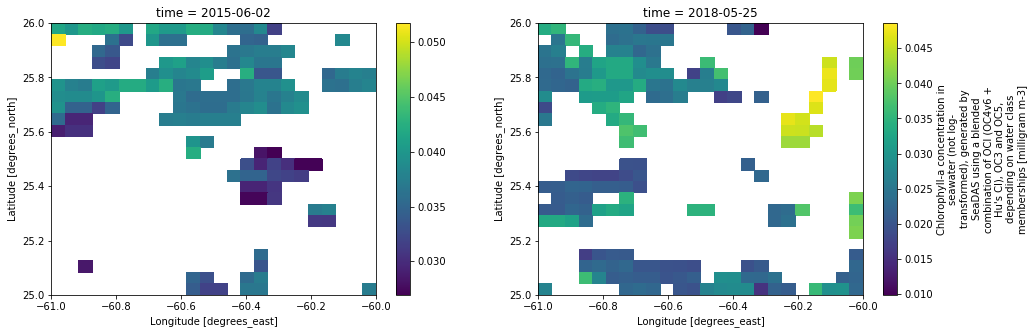

In [14]:
# Note: the color ranges are not the same in the two plots. We didn't try to make them the same. We're just exploring
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
subset_chlora.isel(time=0).plot(ax=ax1, cbar_kwargs={'label': ''})
subset_chlora.isel(time=-1).plot(ax=ax2);

That's an awfully long colorbar caption!

## Plot as a spatially averaged time series
We'll build on what we learned in the previous notebook.

In [15]:
chlora_xymean = subset_chlora.mean({'latitude','longitude'})

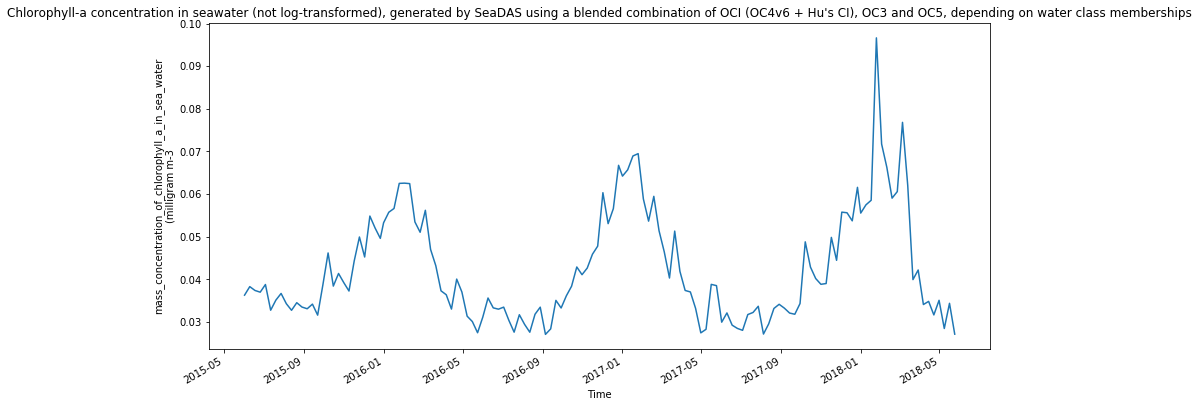

In [16]:
chlora_xymean.plot(figsize=(14,6))
plt.ylabel(f"{subset_chlora.standard_name}\n({subset_chlora.units}")
plt.title(subset_chlora.long_name);

**The period around 2018 Feb-Mar is pretty interesting, compared to previous years!** Let's zoom in a bit.

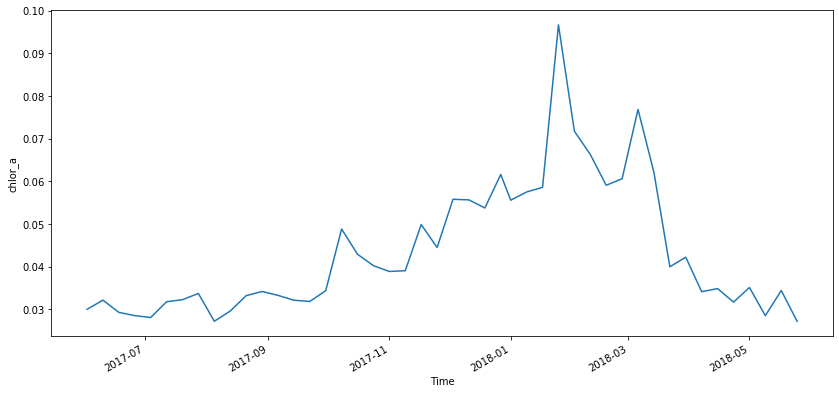

In [17]:
chlora_xymean.sel(time=slice(datetime.datetime(2017,6,1), datetime.datetime(2018,6,1))).plot(figsize=(14,6));

Exercise: issue a query to PODAAC Ostia to get the 1-year time series for this small bbox, to plot SST on the same plot as chlorophyll

# Search PODAAC SST for the same spatial bounding box and temporal range

## PODAAC utilities to make querying easier and more compact
But this implementation does not reuse podaac objects.

In [18]:
def get_podaac_granuleurls(keyword, start_dt, end_dt, items_per_page='400'):
    import configparser
    from lxml import objectify

    import podaac.podaac as podaac
    # to obtain rich information from PO.DAAC Drive, import and create an instance of Drive
    from podaac import drive as podaacdrive
    
    # for search capabilities import podaacpy, then create an instance of the Podaac class
    p = podaac.Podaac()
    
    with open(BASEPATH / 'podaac.ini', 'r') as f:
        config = configparser.ConfigParser()
        config.read_file(f)
        d = podaacdrive.Drive(None, 
                              config['drive']['urs_username'], 
                              config['drive']['urs_password'])
    
    dresult = p.dataset_search(keyword=keyword, start_time=start_dt, end_time=end_dt)
    dresult_xml = objectify.fromstring(dresult)
    # But note that there can be multiple entry instances, so list handling would be needed, generically
    # The "podaac:datasetId" element would probably be more correct than "id"
    dataset_id = dresult_xml.entry.id.text    
    gresult = p.granule_search(dataset_id=dataset_id, start_time=start_dt, end_time=end_dt,
                               items_per_page=items_per_page)
    # podaacpy provides a convenience function which enables easy access to all Drive urls
    urls = d.mine_drive_urls_from_granule_search(granule_search_response=gresult)
    opendap_urls = [w.replace('-tools.jpl.nasa.gov/drive/files/', '-opendap.jpl.nasa.gov/opendap/') 
                    for w in urls]
    
    return dataset_id, opendap_urls

## Prepare and issue the query, as done in the PODAAC notebook

We'll want to be careful with the datetime range, so as not to issue a request for a ton of data; we don't want to wait a long time, or stress the PO.DAAC servers too much.

In [19]:
start_time='2018-01-15T00:00:00Z'
end_time='2018-04-15T23:59:59Z'

In [20]:
podaac_dataset_id, podaac_urls = get_podaac_granuleurls('ostia', start_time, end_time)

In [21]:
print(f"dataset_id: {podaac_dataset_id}. Number of granule urls: {len(podaac_urls)}")

dataset_id: PODAAC-GHOST-4FK02. Number of granule urls: 92


In [22]:
ds_ostia = xr.open_mfdataset(podaac_urls, coords='minimal')

**NOTE: we have to make some changes to the query parameters, relative to the CCI chlorphyll dataset:**
- Use lat and lon instead of latitude and longitude
- Change the latitude slice order, to be in ascending order

In [23]:
ostia_xy_bbox = dict(lat=slice(25,26), lon=slice(-61,-60))

In [24]:
subset_ostia = ds_ostia.sel(**ostia_xy_bbox).mean({'lat','lon'})

In [25]:
subset_ostia

<xarray.Dataset>
Dimensions:           (time: 92)
Coordinates:
  * time              (time) datetime64[ns] 2018-01-14T12:00:00 ... 2018-04-15T12:00:00
Data variables:
    analysed_sst      (time) float32 dask.array<shape=(92,), chunksize=(1,)>
    analysis_error    (time) float32 dask.array<shape=(92,), chunksize=(1,)>
    sea_ice_fraction  (time) float32 dask.array<shape=(92,), chunksize=(1,)>
    mask              (time) float32 dask.array<shape=(92,), chunksize=(1,)>

## Now we can examine the SST time series

**Probably should use Dask persist or compute, first?**

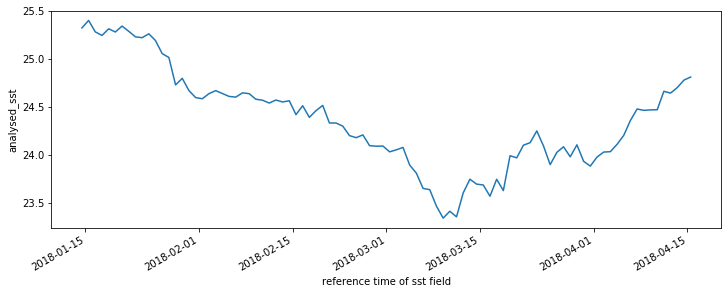

In [26]:
(subset_ostia.analysed_sst - 273.15).plot(figsize=(12,4))